<a href="https://colab.research.google.com/github/rakunann333/superleprecon/blob/master/analy%5Cmiura_program%5Cboltzmann_plot_v00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install netcdf4 
!pip install git+https://github.com/fujiisoup/pyspectra.git

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyspectra

     |████████████████████████████████| 4.3MB 2.7MB/s 
     |████████████████████████████████| 296kB 34.5MB/s 
  Cloning https://github.com/fujiisoup/pyspectra.git to /tmp/pip-req-build-a6cz8y30
  Running command git clone -q https://github.com/fujiisoup/pyspectra.git /tmp/pip-req-build-a6cz8y30
  Created wheel for pyspectra: filename=pyspectra-0.0.1-cp36-none-any.whl size=18317 sha256=719d40168b050f77630ea1023386824f56f04d2f5d0fdcdf18c14e47e6e2c252
  Stored in directory: /tmp/pip-ephem-wheel-cache-f4oq8rho/wheels/a7/c4/4a/152e6df7ccc3c6838abee31c086e30a3690c80966eb588e7a2
Successfully built pyspectra


In [ ]:
# 420000
!gdown --id 1D-ei1aOF9UcPsabwWODoIWXsfJI7tkbC
# 425000
!gdown --id 1Cv108JUtq62Is3OdJaROOFv8IT3XGxwt
# 430000
!gdown --id 1Cg16-DOVkZxx7V5E4qjrxdgNVpDWn-v-
# 435000
!gdown --id 1CfAeXM-hIXZuFiI4s2Q62vK-wm5mIlUF
# 440000
!gdown --id 1E940uAcfAmQkpv8fkznM3hDgFZC7rVyX
# 445000
!gdown --id 1E5VNRt4FusKXBI_updbfosojJ5LVw0w0
# 450000
!gdown --id 1E4MxDbkx6dw4licAy1Dj_SuRk3IUvUZx
# 455000
!gdown --id 1E0ERQyRddax0Slpvn6nXtHZO-G9PhTae
# 460000
!gdown --id 1DwYGssGo6Ldah-DHePenP_F-S-JJfe82
# 465000
!gdown --id 1DsglmEyhOK-JRywP0rAvRixsqh8Pz_TG
# 470000
!gdown --id 1DrhtlVflhfjFemLjs1jbvE9qwGO3GEEn
# 475000
!gdown --id 1DmV1Eom2mtHyMsBcHH9HwQwIQaQ5jK44
# 480000
!gdown --id 1Dkr_ZcSFteIiAm3dttF7o9K7PlaJX0wb


Downloading...
From: https://drive.google.com/uc?id=1D-ei1aOF9UcPsabwWODoIWXsfJI7tkbC
To: /content/H_420000.nc
2.11MB [00:00, 67.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Cv108JUtq62Is3OdJaROOFv8IT3XGxwt
To: /content/H_425000.nc
2.11MB [00:00, 66.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Cg16-DOVkZxx7V5E4qjrxdgNVpDWn-v-
To: /content/H_430000.nc
2.11MB [00:00, 66.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CfAeXM-hIXZuFiI4s2Q62vK-wm5mIlUF
To: /content/H_435000.nc
2.11MB [00:00, 67.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E940uAcfAmQkpv8fkznM3hDgFZC7rVyX
To: /content/H_440000.nc
2.11MB [00:00, 67.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E5VNRt4FusKXBI_updbfosojJ5LVw0w0
To: /content/H_445000.nc
2.11MB [00:00, 67.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E4MxDbkx6dw4licAy1Dj_SuRk3IUvUZx
To: /content/H_450000.nc
2.11MB [00:00, 65.1MB/s]
Downloading...
From: https://drive.google.com/uc

In [ ]:
def load(filename):
  data = xr.open_dataarray(filename)
  data['pulse'] = int(data.attrs['motor_coordinate'])
  return data

(2048.0, 0.0)

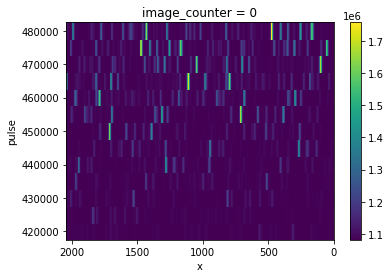

In [ ]:
data = xr.concat([load('./H_{}.nc'.format(pulse)) for pulse in 
                  [420000, 425000, 430000, 435000, 440000, 445000, 450000,
                   455000, 460000, 465000, 470000, 475000, 480000,]], dim='pulse')

data.sum('y').plot()
plt.xlim(2048, 0)

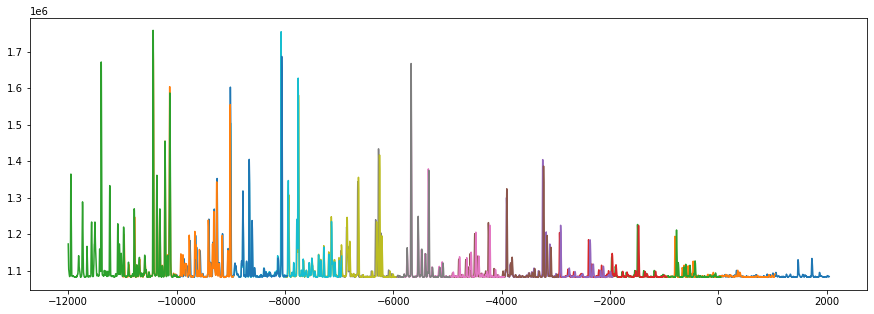

In [ ]:
plt.figure(figsize=(15, 5))
long_data = []
for i, p in enumerate(data['pulse']):
  d = data.sel(pulse=p).copy()
  d['long_x'] = d['x'][::-1] - 1000 * i
  d['x'] = data['x']
  long_data.append(d.sum('y'))
  plt.plot(d['long_x'], d.sum('y'))
long_data = xr.concat(long_data, dim='pulse')

In [ ]:
long_data

<xarray.DataArray (pulse: 13, x: 2048)>
array([[1084435, 1084869, 1084738, ..., 1084205, 1084042, 1084100],
       [1091293, 1091396, 1091510, ..., 1083654, 1083273, 1083255],
       [1082976, 1083197, 1082899, ..., 1084363, 1084239, 1084094],
       ...,
       [1086555, 1086688, 1086342, ..., 1088884, 1088554, 1088019],
       [1085457, 1084506, 1084317, ..., 1090590, 1092985, 1095157],
       [1082596, 1083040, 1082501, ..., 1152819, 1162891, 1173495]],
      dtype=uint64)
Coordinates:
    image_counter  int32 0
  * x              (x) int64 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
  * pulse          (pulse) int64 420000 425000 430000 ... 470000 475000 480000
    long_x         (pulse, x) int64 2047 2046 2045 2044 ... -11998 -11999 -12000

(500.0, 0.0)

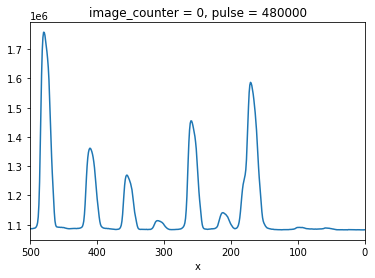

In [ ]:
long_data.sel(pulse=480000).plot()
plt.xlim(500, 0)

(1500.0, 0.0)

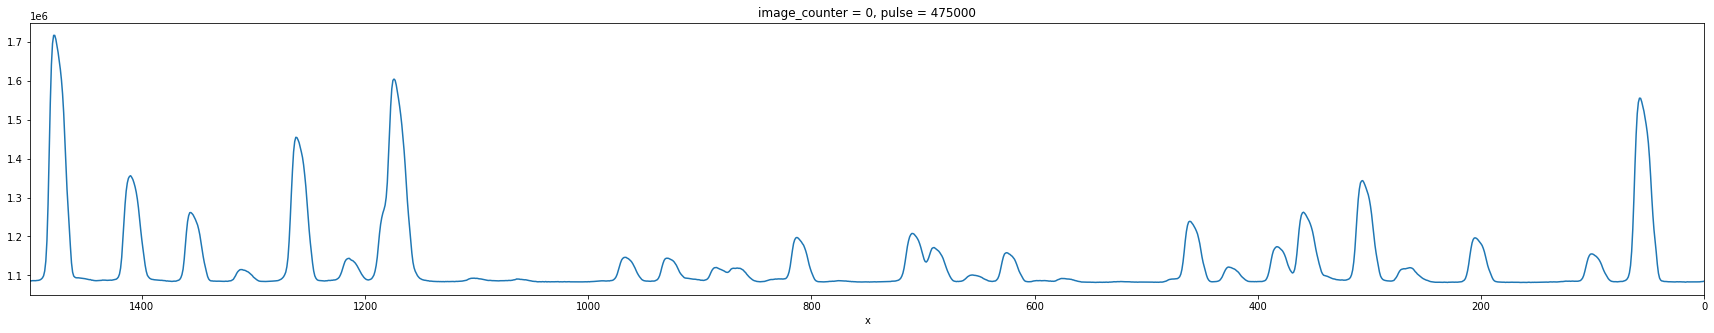

In [ ]:
plt.figure(figsize=(30, 5))
long_data.sel(pulse=475000).plot()
plt.xlim(1500, 0)

# Fit the spectrum

fit:

$$
\mathrm{argmin}_\theta\left(\sum_i (y_i - f(x_i | \theta))^2\right)
$$

gaussian

$$
\frac{A}{\sqrt{2\pi}w} \exp\left(-\frac{(x-x_0)^2}{2w^2}\right) + y_0
$$

In [ ]:
def fit(da):
  popt, perr = pyspectra.fit.singlepeak_fit(da['x'].values, da.values)
  return xr.Dataset({
      'A': popt[0], 'x0': popt[1], 'w': popt[2], 'y0': popt[3],
      'data': da,
      'fit': ('x', pyspectra.profiles.Gauss(da['x'].values, *popt))},
      coords={'x': da['x']})

<xarray.Dataset>
Dimensions:        (x: 71)
Coordinates:
    image_counter  int32 0
  * x              (x) int64 1430 1431 1432 1433 1434 ... 1497 1498 1499 1500
    pulse          int64 475000
    long_x         (x) int64 -10383 -10384 -10385 ... -10451 -10452 -10453
Data variables:
    A              float64 9.721e+06
    x0             float64 1.476e+03
    w              float64 5.851
    y0             float64 1.082e+06
    data           (x) uint64 1087897 1087449 1087769 ... 1086150 1086182
    fit            (x) float64 1.082e+06 1.082e+06 ... 1.083e+06 1.083e+06
    v              int64 0
    N              int64 1
    wavelength     float64 601.8

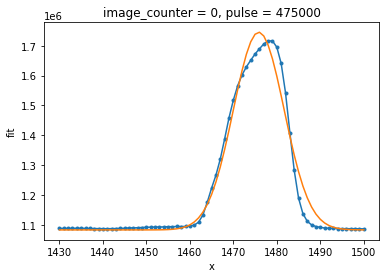

In [ ]:
# (v-v)=(0-0) Q1
result_00Q1 = fit(long_data.sel(pulse=475000).sel(x=slice(1430, 1500)))
result_00Q1['v'] = 0
result_00Q1['N'] = 1
result_00Q1['wavelength'] = 601.8299
result_00Q1['data'].plot(marker='.')
result_00Q1['fit'].plot()
result_00Q1

<xarray.Dataset>
Dimensions:        (x: 81)
Coordinates:
    image_counter  int32 0
  * x              (x) int64 1300 1301 1302 1303 1304 ... 1377 1378 1379 1380
    pulse          int64 475000
    long_x         (x) int64 -10253 -10254 -10255 ... -10331 -10332 -10333
Data variables:
    A              float64 2.485e+06
    x0             float64 1.354e+03
    w              float64 5.532
    y0             float64 1.092e+06
    data           (x) uint64 1095934 1099839 1102513 ... 1086643 1086861
    fit            (x) float64 1.092e+06 1.092e+06 ... 1.092e+06 1.092e+06
    v              int64 0
    N              int64 2
    wavelength     float64 602.4

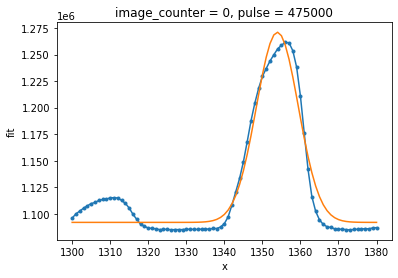

In [ ]:
# (v-v)=(0-0) Q2
result_00Q2 = fit(long_data.sel(pulse=475000).sel(x=slice(1300, 1380)))
result_00Q2['v'] = 0
result_00Q2['N'] = 2
result_00Q2['wavelength'] = 602.3757
result_00Q2['data'].plot(marker='.')
result_00Q2['fit'].plot()
result_00Q2

<xarray.Dataset>
Dimensions:        (x: 101)
Coordinates:
    image_counter  int32 0
  * x              (x) int64 1100 1101 1102 1103 1104 ... 1197 1198 1199 1200
    pulse          int64 475000
    long_x         (x) int64 -10053 -10054 -10055 ... -10151 -10152 -10153
Data variables:
    A              float64 9.698e+06
    x0             float64 1.172e+03
    w              float64 7.58
    y0             float64 1.087e+06
    data           (x) uint64 1092659 1092471 1093034 ... 1090048 1092263
    fit            (x) float64 1.087e+06 1.087e+06 ... 1.088e+06 1.087e+06
    v              int64 0
    N              int64 3
    wavelength     float64 603.2

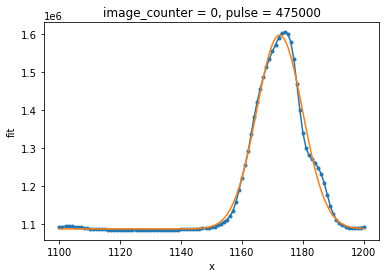

In [ ]:
# (v-v)=(0-0) Q3
result_00Q3 = fit(long_data.sel(pulse=475000).sel(x=slice(1100, 1200)))
result_00Q3['v'] = 0
result_00Q3['N'] = 3
result_00Q3['wavelength'] = 603.1909
result_00Q3['data'].plot(marker='.')
result_00Q3['fit'].plot()
result_00Q3

<xarray.Dataset>
Dimensions:        (x: 41)
Coordinates:
    image_counter  int32 0
  * x              (x) int64 900 901 902 903 904 905 ... 935 936 937 938 939 940
    pulse          int64 475000
    long_x         (x) int64 -9853 -9854 -9855 -9856 ... -9890 -9891 -9892 -9893
Data variables:
    A              float64 8.469e+05
    x0             float64 927.0
    w              float64 5.803
    y0             float64 1.089e+06
    data           (x) uint64 1088619 1089184 1089185 ... 1087776 1086374
    fit            (x) float64 1.089e+06 1.089e+06 ... 1.096e+06 1.094e+06
    v              int64 0
    N              int64 4
    wavelength     float64 604.3

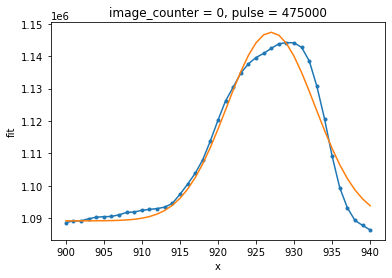

In [ ]:
# (v-v)=(0-0) Q4
result_00Q4 = fit(long_data.sel(pulse=475000).sel(x=slice(900, 940)))
result_00Q4['v'] = 0
result_00Q4['N'] = 4
result_00Q4['wavelength'] = 604.2716
result_00Q4['data'].plot(marker='.')
result_00Q4['fit'].plot()
result_00Q4

In [ ]:
result_00 = xr.concat([result_00Q1, result_00Q2, result_00Q3, result_00Q4], dim='N')
result_00

<xarray.Dataset>
Dimensions:        (N: 4, x: 294)
Coordinates:
    pulse          int64 475000
    image_counter  int32 0
  * x              (x) int64 900 901 902 903 904 ... 1496 1497 1498 1499 1500
    long_x         (N, x) float64 nan nan nan nan nan ... nan nan nan nan nan
  * N              (N) int64 1 2 3 4
Data variables:
    A              (N) float64 9.721e+06 2.485e+06 9.698e+06 8.469e+05
    x0             (N) float64 1.476e+03 1.354e+03 1.172e+03 927.0
    w              (N) float64 5.851 5.532 7.58 5.803
    y0             (N) float64 1.082e+06 1.092e+06 1.087e+06 1.089e+06
    data           (N, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    fit            (N, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    v              (N) int64 0 0 0 0
    wavelength     (N) float64 601.8 602.4 603.2 604.3

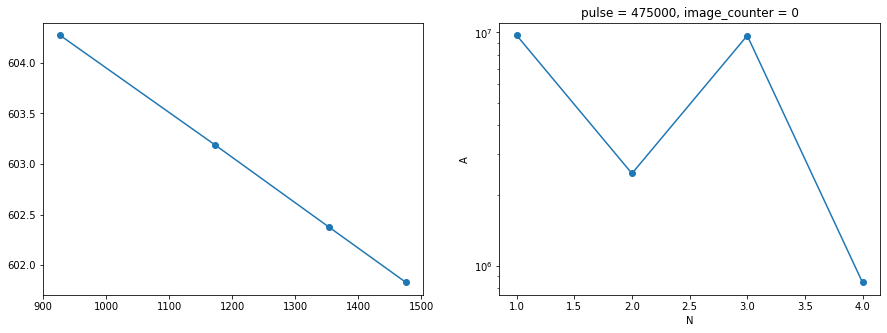

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(result_00['x0'], result_00['wavelength'], '-o')
plt.subplot(1, 2, 2)
result_00['A'].plot(marker='o')
plt.yscale('log')

In [ ]:
wavelength_00 = [605.6091, 607.1996]
#                      Q5         Q6
np.poly1d(np.polyfit(result_00['wavelength'], result_00['x0'], deg=2))(wavelength_00)

array([619.27966115, 246.55148236])

<xarray.Dataset>
Dimensions:        (x: 36)
Coordinates:
    image_counter  int32 0
  * x              (x) int64 605 606 607 608 609 610 ... 635 636 637 638 639 640
    pulse          int64 475000
    long_x         (x) int64 -9558 -9559 -9560 -9561 ... -9590 -9591 -9592 -9593
Data variables:
    A              float64 1.279e+06
    x0             float64 622.8
    w              float64 6.279
    y0             float64 1.08e+06
    data           (x) uint64 1083922 1083928 1084257 ... 1084920 1085435
    fit            (x) float64 1.081e+06 1.082e+06 ... 1.083e+06 1.082e+06
    v              int64 0
    N              int64 5
    wavelength     float64 605.6

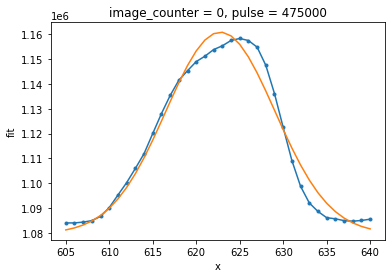

In [ ]:
# (v-v)=(0-0) Q5
result_00Q5 = fit(long_data.sel(pulse=475000).sel(x=slice(605, 640)))
result_00Q5['v'] = 0
result_00Q5['N'] = 5
result_00Q5['wavelength'] = 605.6091
result_00Q5['data'].plot(marker='.')
result_00Q5['fit'].plot()
result_00Q5

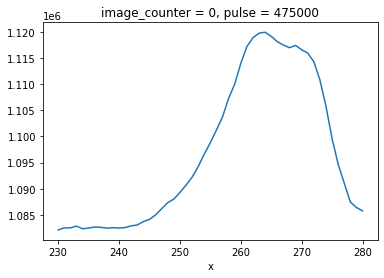

In [ ]:
long_data.sel(pulse=475000).sel(x=slice(230, 280)).plot()

<xarray.Dataset>
Dimensions:        (x: 51)
Coordinates:
    image_counter  int32 0
  * x              (x) int64 230 231 232 233 234 235 ... 275 276 277 278 279 280
    pulse          int64 475000
    long_x         (x) int64 -9183 -9184 -9185 -9186 ... -9230 -9231 -9232 -9233
Data variables:
    A              float64 7.585e+05
    x0             float64 265.2
    w              float64 7.798
    y0             float64 1.082e+06
    data           (x) uint64 1082134 1082518 1082522 ... 1086427 1085772
    fit            (x) float64 1.082e+06 1.082e+06 ... 1.091e+06 1.089e+06
    v              int64 0
    N              int64 6
    wavelength     float64 607.2

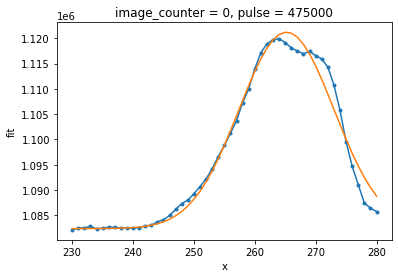

In [ ]:
# (v-v)=(0-0) Q6
result_00Q6 = fit(long_data.sel(pulse=475000).sel(x=slice(230, 280)))
result_00Q6['v'] = 0
result_00Q6['N'] = 6
result_00Q6['wavelength'] = 607.1996
result_00Q6['data'].plot(marker='.')
result_00Q6['fit'].plot()
result_00Q6

In [ ]:
result_00 = xr.concat([result_00Q1, result_00Q2, result_00Q3, result_00Q4, result_00Q5, result_00Q6], dim='N')
result_00

<xarray.Dataset>
Dimensions:        (N: 6, x: 381)
Coordinates:
    pulse          int64 475000
    image_counter  int32 0
  * x              (x) int64 230 231 232 233 234 ... 1496 1497 1498 1499 1500
    long_x         (N, x) float64 nan nan nan nan nan ... nan nan nan nan nan
  * N              (N) int64 1 2 3 4 5 6
Data variables:
    A              (N) float64 9.721e+06 2.485e+06 ... 1.279e+06 7.585e+05
    x0             (N) float64 1.476e+03 1.354e+03 1.172e+03 927.0 622.8 265.2
    w              (N) float64 5.851 5.532 7.58 5.803 6.279 7.798
    y0             (N) float64 1.082e+06 1.092e+06 ... 1.08e+06 1.082e+06
    data           (N, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    fit            (N, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    v              (N) int64 0 0 0 0 0 0
    wavelength     (N) float64 601.8 602.4 603.2 604.3 605.6 607.2

Text(0, 0.5, 'A')

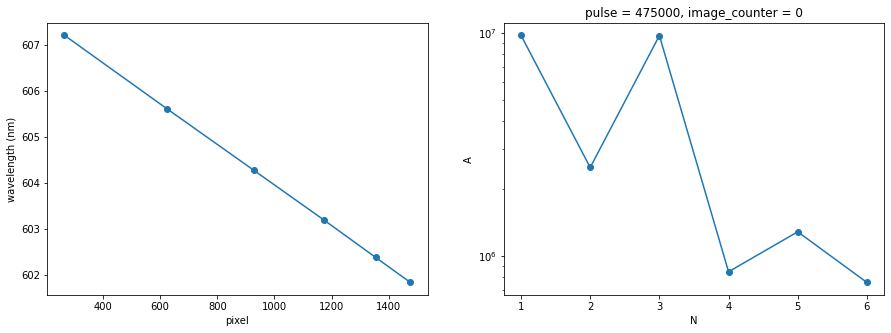

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(result_00['x0'], result_00['wavelength'], '-o')
plt.xlabel('pixel')
plt.ylabel('wavelength (nm)')
plt.subplot(1, 2, 2)
result_00['A'].plot(marker='o')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('A')

## Estimate population from the intensity

$$
A_N \propto n_N g_N g_\mathrm{as} 
$$

$n_N$ : population with the rotational quantum number $N$

$g_N$: statistical weight for the rotational quantum number $N$, $g_N = 2(N+1)$

$g_\mathrm{as}$ : statistical weight for the nuclear symmetry, $g_\mathrm{as} = \mathrm{mod} (N) * 2 + 1$

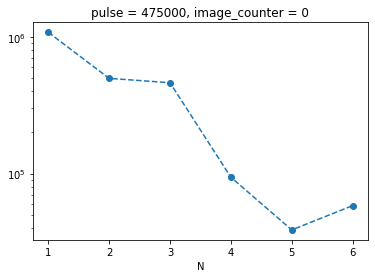

In [ ]:
g_N = result_00['N'] * 2 + 1
g_as = (result_00['N'] % 2) * 2 + 1
population = result_00['A'] / g_N / g_as
population.plot(marker='o', ls='--')
plt.yscale('log')

downloading from https://webbook.nist.gov/cgi/cbook.cgi?ID=C1333740&amp;Units=SI&amp;Mask=1000


Text(0.5, 1.0, '(v\'-v")=(0-0) Q branch')

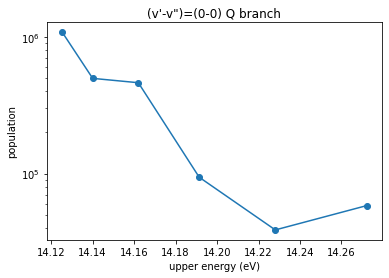

In [ ]:
upper_energy = pyspectra.molecules.level('H2', 'd 3u 3p', v=0, J=result_00['N'])

plt.semilogy(upper_energy, population, '-o')
plt.xlabel('upper energy (eV)')
plt.ylabel('population')
plt.title("""(v'-v\")=(0-0) Q branch""")

In [ ]:
constants = pyspectra.data.diatomic_molecules('H2').fillna(0)
constants

<xarray.Dataset>
Dimensions:  (state: 40)
Coordinates:
  * state    (state) object 't 3u+ 5f' 'q (3g+) 5d' ... 'B 1u+ 2p' 'X 1g 1s2'
Data variables:
    Te       (state) float64 1.213e+05 1.213e+05 1.21e+05 ... 9.17e+04 0.0
    we       (state) float64 2.661e+03 0.0 2.321e+03 ... 1.358e+03 4.401e+03
    wexe     (state) float64 121.9 0.0 62.86 0.0 ... 130.5 69.52 20.89 121.3
    weye     (state) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 100.0 0.0 0.0 0.0 0.0
    Be       (state) float64 6.0 6.0 29.95 6.0 11.0 ... 32.68 31.36 20.02 60.85
    alpha_e  (state) float64 0.0 0.0 1.24 0.0 0.0 ... 1.818 1.665 1.185 3.062
    gamma_e  (state) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 101.0 0.0 0.0 0.0 0.0
    De       (state) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0223 0.01625 0.0471
    beta_e   (state) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 -0.00074 0.0 0.0
    re       (state) float64 0.0 0.0 1.057 0.0 0.0 ... 1.012 1.033 1.293 0.7414
    trans.   (state) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    nu00     (state) float64 2.534e+04 2.532e+04 2.485e+04 ... 9.02e+04 0.0
Attributes:
    name:     H2

In [ ]:
v = 0
Bv = constants['Be'] + - constants['alpha_e'] * (v + 0.5) + constants['gamma_e'] * (v + 0.5)**2
#   d state                 X state
Bv.sel(state='d 3u 3p'), Bv.sel(state='X 1g 1s2')

(<xarray.DataArray ()>
 array(29.5915)
 Coordinates:
     state    <U7 'd 3u 3p', <xarray.DataArray ()>
 array(59.3219)
 Coordinates:
     state    <U8 'X 1g 1s2')